# Lorenz system

$$
\dot{x} = s(y - x),\quad \dot{y} = x (r - z) - y, \quad \dot{z} = xy - bz
$$
ローレンツ方程式の平衡点を追跡する

In [1]:
import numpy as np
import pathfollowing as pf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '-'})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def func(x, a):
    s = 10.0
    b = 8.0/3.0
    r = a[0]
    return np.array([s*(x[1]-x[0]), x[0]*(r - x[2])-x[1], x[0]*x[1]-b*x[2]])

def dfdx(x, a):
    s = 10.0
    b = 8.0/3.0
    r = a[0]
    return np.array([[-s,s,0.0],[r-x[2],-1.0,-x[0]], [x[1],x[0],-b]])

def dfda(x,a):
    return np.array([0.0, x[0], 0.0])

平衡点の追跡

In [3]:
x=np.array([0.0, 0.0, 0.0])
a=np.array([0.0])
bd,bp,lp,hb=pf.pathfollow(x, a, func, dfdx, dfda,nmax=100, h=0.05, epsr=1.0e-10, epsb=1.0e-10, problem='equilibria', quiet=True)
print("BP:", bp)
print("LP:", lp)
print("HB:", hb)

BP: [20]
LP: []
HB: []


非自明平衡点の枝に切り替え

In [4]:
v2 = pf.calcSwitchingVectorBP(bd[bp[0]], func, dfdx, dfda)
x2=bd[bp[0]]['x']
a2=bd[bp[0]]['a']
bd2,bp2,lp2,hb2=pf.pathfollow(x2, a2, func, dfdx, dfda, w=v2, nmax=110, h=-0.05, epsr=1.0e-10, epsb=1.0e-10, problem='equilibria',quiet=True)
bd3,bp3,lp3,hb3=pf.pathfollow(x2, a2, func, dfdx, dfda, w=v2, nmax=110, h=0.05, epsr=1.0e-10, epsb=1.0e-10,problem='equilibria',quiet=True)

In [5]:
bd_r = np.array([bd[m]['a'][0] for m in range(len(bd))])
bd_x = np.array([bd[m]['x'][0] for m in range(len(bd))])
bd_r2 = np.array([bd2[m]['a'][0] for m in range(len(bd2))])
bd_x2 = np.array([bd2[m]['x'][0] for m in range(len(bd2))])
bd_r3 = np.array([bd3[m]['a'][0] for m in range(len(bd3))])
bd_x3 = np.array([bd3[m]['x'][0] for m in range(len(bd3))])

In [6]:
print(bp, lp, hb)
print(bp2, lp2, hb2)
print(bp3, lp3, hb3)

[20] [] []
[] [] []
[] [] []


In [7]:
print(bd[bp[0]])
print(bd2[0])
print(bd2[1])

{'TY': 'B', 'x': array([0., 0., 0.]), 'a': array([1.]), 'v': array([-0.,  0., -0.,  1.]), 'phi': array([-0.09950372, -0.99503719,  0.        ,  0.        ]), 'udim': 1}
{'TY': 'R', 'x': array([0., 0., 0.]), 'a': array([1.]), 'v': array([0.70710678, 0.70710678, 0.        , 0.        ]), 'udim': 1}
{'TY': 'R', 'x': array([-0.03535534, -0.03535534,  0.00046875]), 'a': array([1.00046875]), 'v': array([ 0.70685832,  0.70685832, -0.01874341, -0.01874341]), 'udim': 0}


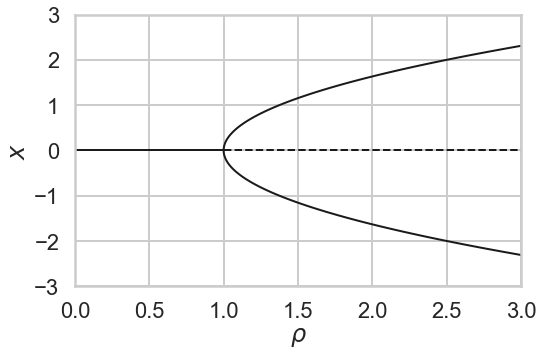

In [8]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(0,3)
ax.set_ylim(-3, 3)
ax.set_xlabel(r"$\rho$")
ax.set_ylabel("$x$")
ax.plot(bd_r[:21], bd_x[:21], '-k')
ax.plot(bd_r[20:], bd_x[20:], '--k')
ax.plot(bd_r2, bd_x2, '-k')
ax.plot(bd_r3, bd_x3, '-k')
# plt.savefig("bd_lrz.pdf", bbox_inches='tight')

## Hopf分岐の検出

In [9]:
x=np.array([0.0, 0.0, 0.0])
a=np.array([0.0])
bd,bp,lp,hb=pf.pathfollow(x, a, func, dfdx, dfda, nmax=300, h=0.1, epsr=1.0e-10, epsb=1.0e-10, problem='equilibria', quiet=True)

非自明平衡点の枝へ切り替え

In [10]:
v2 = pf.calcSwitchingVectorBP(bd[bp[0]], func, dfdx, dfda)
x2=bd[bp[0]]['x']
a2=bd[bp[0]]['a']
bd2,bp2,lp2, hb2=pf.pathfollow(x2, a2, func, dfdx, dfda, w=v2, nmax=850, h=-0.05, epsr=1.0e-10, epsb=1.0e-10, problem='equilibria', quiet=True)
# bd3,bp3,lp3=pf.pathfollow(x2, a2, func, dfdx, dfda, w=v2, nmax=110, h=0.05, epsr=1.0e-10, epsb=1.0e-10,problem='equilibria')

分岐点とホップ分岐点の確認

In [11]:
print(bp, hb2)

[11] [728]


In [12]:
bd_r = np.array([bd[m]['a'][0] for m in range(len(bd))])
bd_x = np.array([bd[m]['x'][0] for m in range(len(bd))])
bd_r2 = np.array([bd2[m]['a'][0] for m in range(len(bd2))])
bd_x2 = np.array([bd2[m]['x'][0] for m in range(len(bd2))])
# bd_r3 = np.array([bd3[m]['a'][0] for m in range(len(bd3))])
# bd_x3 = np.array([bd3[m]['x'][0] for m in range(len(bd3))])

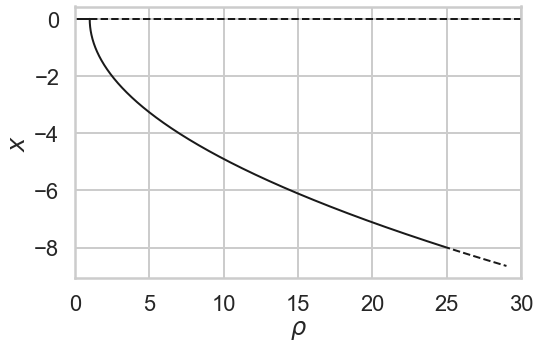

In [13]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(0,30)
ax.set_xlabel(r"$\rho$")
ax.set_ylabel("$x$")
ax.plot(bd_r[:11], bd_x[:11], '-k')
ax.plot(bd_r[11:], bd_x[11:], '--k')
ax.plot(bd_r2[:728], bd_x2[:728], '-k')
ax.plot(bd_r2[728:], bd_x2[728:], '--k')
# ax.plot(bd_r3, bd_x3, '-k')
# plt.savefig("bd_lrz.pdf", bbox_inches='tight')